In [3]:
import pandas as pd
import datetime
import sqlite3
import numpy as np

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
df = pd.read_csv('online_retail.csv')
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
# Привожу все колонки к одному naming convention
#переименовываем колонки 
df.rename(columns=
{
    'InvoiceNo':'invoice_no', 
    'StockCode':'stock_code',
    'Description':'description', 
    'Quantity':'quantity',
    'InvoiceDate':'invoice_date', 
    'UnitPrice':'unit_price', 
    'CustomerID':'customer_id', 
    'Country':'country'
       }, inplace=True)

In [ ]:
#Из условия известно что если InvoiceNo начинается с "С" это значит товар отменен 
transactions_canceled= df[df['invoice_no'].str.startswith('C')]

# Вывод отмененных транзакций
transactions_canceled

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#Посмотрим есть ли еще отрицательные значения quantity.  
# Отфильтровать строки, где столбец 'quantity' меньше нуля и 'invoice_no' не начинается с 'C'
filtered_df = df.loc[(df['quantity'] < 0) & (~df['invoice_no'].str.startswith('C'))]
filtered_df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [ ]:
#посмотрим сколько значений где description отсутствует и quantity <0
filtred_description = df.loc[(df['quantity'] < 0) & (df['description'].isnull())]
filtred_description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
517719,580087,84341B,NaN,-2,12/1/2011 14:27,0.0,NaN,United Kingdom
521333,580359,20775,NaN,-35,12/2/2011 16:11,0.0,NaN,United Kingdom
522160,580379,72225C,NaN,-144,12/2/2011 17:57,0.0,NaN,United Kingdom
522162,580381,21758,NaN,-9,12/2/2011 17:58,0.0,NaN,United Kingdom


In [ ]:
#смотрим на значения с отрицательным quantity и description с указанными значениями 
#видим, что значения отрицательные когда продукт мог быть не исправен, поврежден, потерян и т д  
fdf = df.loc[(df['quantity'] < 0) & (~df['description'].isnull()) & (~df['invoice_no'].str.startswith('C'))]
fdf 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,12/6/2010 15:36,0.0,NaN,United Kingdom
13264,537432,35833G,damages,-43,12/6/2010 16:10,0.0,NaN,United Kingdom
21338,538072,22423,faulty,-13,12/9/2010 14:10,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [ ]:
df['total_amount'] = df['quantity'] * df['unit_price']

In [ ]:
#Проверим типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
 8   total_amount  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
df.invoice_date = pd.to_datetime(df.invoice_date)

In [ ]:
#Проверяем данные на пустые значения 
df.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
total_amount         0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]
#не можем удалить пропущенные значения customer_id, т к потеряем часть данных, поэтому заменим на Unknown
df['customer_id'] = df['customer_id'].fillna('Unknown')

In [ ]:
df[df.duplicated()].sort_values('stock_code')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount
139262,548309,10120,DOGGY RUBBER,1,2011-03-30 12:02:00,0.21,16657.0,United Kingdom,0.21
248503,558860,10125,MINI FUNKY DESIGN TAPES,1,2011-07-04 12:18:00,0.85,17975.0,United Kingdom,0.85
308705,564049,10133,COLOURING PENCILS BROWN TUBE,10,2011-08-22 13:30:00,0.42,17585.0,United Kingdom,4.20
239419,558049,10133,COLOURING PENCILS BROWN TUBE,1,2011-06-24 14:16:00,0.42,15850.0,United Kingdom,0.42
396055,571054,10135,COLOURING PENCILS BROWN TUBE,1,2011-10-13 13:58:00,1.25,14234.0,United Kingdom,1.25
...,...,...,...,...,...,...,...,...,...
414140,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom,72.00
414141,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom,72.00
414144,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom,72.00
414143,572344,M,Manual,48,2011-10-24 10:43:00,1.50,14607.0,United Kingdom,72.00


In [ ]:
df = df.drop_duplicates() # удаляем полные дубликаты по строкам 
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
#Проведем RFM-анализ для выявления лояльных клиентов
present_date = datetime.datetime(year=2011, month=12, day=10, hour = 10, minute = 00, second = 00)


Recency (R) давность покупок 
Frequency (F) частота 
Monetary (M) денежная ценность покупок клиента 

In [ ]:
rfm = df.groupby('customer_id').agg({'invoice_date': lambda date:(present_date-date.max()).days,
                                     'invoice_no':lambda num: len(num.unique()),
                                     'total_amount': lambda price:price.sum()})

In [ ]:
rfm

,invoice_date,invoice_no,total_amount
customer_id,,,
12346.0,325,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18281.0,180,1,80.82
18282.0,7,3,176.60
18283.0,3,16,2045.53


In [ ]:
rfm.columns=['recency','frequency','monetary']

In [ ]:
quartiles = rfm.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary
0.25     17.0        1.0    291.88
0.50     50.0        3.0    644.24
0.75    143.0        5.0   1610.15 <class 'pandas.core.frame.DataFrame'>


In [ ]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'monetary': {0.25: 291.88000000000005,
  0.5: 644.2399999999999,
  0.75: 1610.1499999999996}}

In [ ]:
#создаем функцию для определения сегмента по метрике Recency 
#чем меньше дней тем лучше, значит класс 4
def R_class(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <=d[p][0.50]:
        return 3
    elif x <=d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
#создаем функцию для определения сегмента по метрике Frequency и Monetary
#чем меньше значение частоты и кол-во денег тем хуже, значит класс 1
def FM_class(x,p,d):
    if x <=d[p][0.25]:
        return 1
    elif x <=d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
rfm_seg = rfm 
#создаем новые столбцы, где будут указаны классы для каждого клиента по R,F,M метрикам 
rfm_seg['R'] = rfm_seg['recency'].apply(R_class, args=('recency', quartiles,))
rfm_seg['F'] = rfm_seg['frequency'].apply(FM_class, args=('frequency', quartiles,))
rfm_seg['M'] = rfm_seg['monetary'].apply(FM_class, args=('monetary', quartiles,))

In [ ]:
rfm_seg

,recency,frequency,monetary,R,F,M
customer_id,,,,,,
12346.0,325,2,0.00,1,2,1
12347.0,2,7,4310.00,4,4,4
12348.0,75,4,1797.24,2,3,4
12349.0,19,1,1757.55,3,1,4
12350.0,310,1,334.40,1,1,2
...,...,...,...,...,...,...
18281.0,180,1,80.82,1,1,1
18282.0,7,3,176.60,4,2,1
18283.0,3,16,2045.53,4,4,4


In [ ]:
mon_pivot_table = rfm_seg.pivot_table(index='F', columns='R', values='monetary', aggfunc=np.mean)

In [ ]:
mon_pivot_table

R,1,2,3,4
F,,,,
1,270.689508,422.804447,346.163133,313.431778
2,541.180116,743.428424,698.024790,771.789336
3,1319.302500,1356.563500,1402.091828,1321.377570
4,1855.937568,2459.159863,3841.655430,9699.244593


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

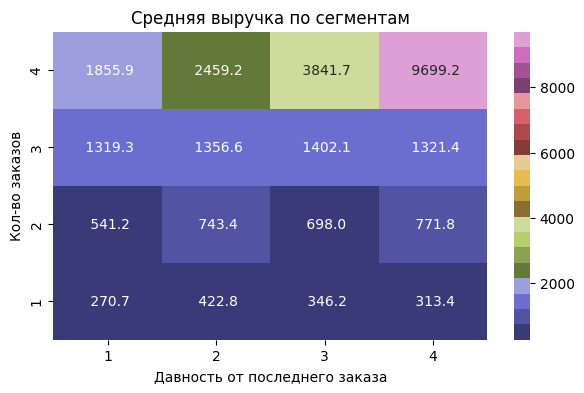

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(mon_pivot_table,annot=True, fmt=' .1f', cmap='tab20b')
plt.title('Средняя выручка по сегментам')
plt.xlabel('Давность от последнего заказа')
plt.ylabel('Кол-во заказов')
plt.gca().invert_yaxis()
plt.show()

11, 21, 31, 41, 12, 32 - нелояльные клиенты. Маленькая выручка, мало покупали
13, 23, 33, 43, 42, 22 - перспективные клиенты 
14, 24 - что-то нужно предпринять, почему так давно покупали 
34, 44 - лояльные клиенты, купили много недавно и на большие суммы


In [ ]:
# Создание ценовых категорий
price_bins = [0, 1, 5, 10, 20, 50, 100, 500, 1000, df['unit_price'].max()]
price_labels = ['0-1', '1-5', '5-10', '10-20', '20-50', '50-100', '100-500', '500-1000', '1000+']
df['price_category'] = pd.cut(df['unit_price'], bins=price_bins, labels=price_labels, right=False)

# Анализ частоты покупок и объема продаж в разных ценовых категориях
purchase_freq = df['price_category'].value_counts().sort_index()
purchase_volume = df.groupby('price_category')['total_amount'].sum().sort_index()


C:\Users\user\AppData\Local\Temp\ipykernel_10392\3235643723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_category'] = pd.cut(df['unit_price'], bins=price_bins, labels=price_labels, right=False)


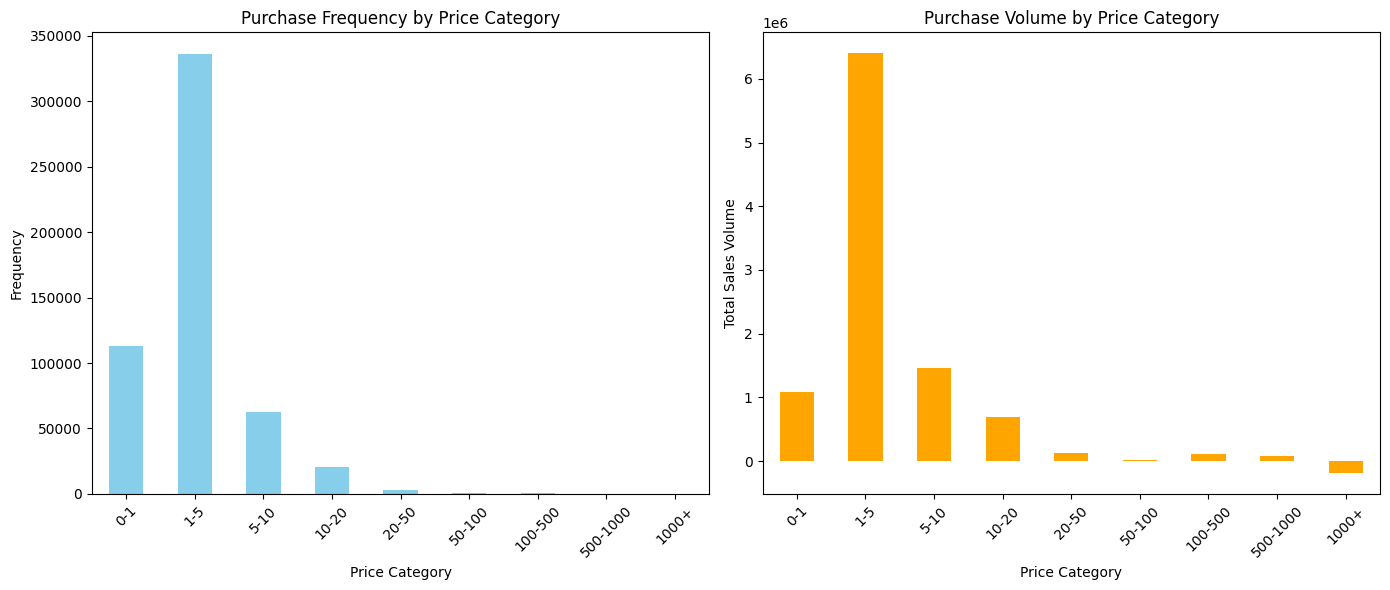

Purchase Frequency by Price Category:
 price_category
0-1         113349
1-5         335720
5-10         62597
10-20        20798
20-50         2758
50-100         380
100-500        782
500-1000       135
1000+          119
Name: count, dtype: int64

Purchase Volume by Price Category:
 price_category
0-1         1081297.054
1-5         6400677.550
5-10        1461152.010
10-20        688194.270
20-50        134768.240
50-100        17943.770
100-500      108100.120
500-1000      81121.100
1000+       -186153.040
Name: total_amount, dtype: float64


In [ ]:
# Визуализация частоты покупок в разных ценовых категориях
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
purchase_freq.plot(kind='bar', color='skyblue')
plt.title('Purchase Frequency by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Визуализация объема продаж в разных ценовых категориях
plt.subplot(1, 2, 2)
purchase_volume.plot(kind='bar', color='orange')
plt.title('Purchase Volume by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# Вывод результатов в виде таблиц
print("Purchase Frequency by Price Category:\n", purchase_freq)
print("\nPurchase Volume by Price Category:\n", purchase_volume)

In [ ]:
conn = sqlite3.connect('online_retail.db')

# Загрузка DataFrame в базу данных
df.to_sql('online_retail', conn, if_exists='replace', index=False)

536641